In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def h(x,w):
  return np.dot(x,w)

def cost(y,h):
  return (0.5/len(y))*np.sum(np.square(y-h))

In [2]:
data = pd.read_excel("/content/drive/MyDrive/NNFL Assignments (Aug 2021)/Assignment 1/data_q1.xlsx")
y = np.array(data['Output'], ndmin=1).T
data.pop('Output')
data.insert(0, "x0", pd.Series(np.ones(len(y))))

# normalizing
for col in data.columns:
  data[col] = data[col]/max(abs(data[col]))
x = np.array(data)
pp = max(abs(y))
y = y/pp

m = len(y) # number of instances
print(np.shape(x), np.shape(y))

(115, 3) (115,)


In [ ]:
# Grid search for LR+BGD
T_grid = list(np.linspace(300,600,31))
alpha_grid = list(np.linspace(1,2,100))

cost_vals = np.zeros((len(T_grid),len(alpha_grid))) # cost values matrix (cost for each combination of T and alpha)

for T in T_grid:
  for alpha in alpha_grid:
    w = np.zeros(3) # zero weights
    for t in range(int(T)):
      for j in range(len(w)):
        w[j] = w[j] - (alpha/m)*np.dot(h(x,w)-y,x[:,j]) # BGD weight update rule
    cost_vals[T_grid.index(T)][alpha_grid.index(alpha)] = cost(y,h(x,w))

# index of minimum cost (argmin)
index = np.unravel_index(np.argmin(cost_vals, axis=None), cost_vals.shape)

print("minimum cost = {}".format(cost_vals[index]))
print("index = {}".format(index))
print("Optimal T value = {}\nOptimal alpha value = {}".format(T_grid[index[0]],alpha_grid[index[1]]))

minimum cost = 0.02414571089888619
index = (8, 75)
Optimal T value = 380.0
Optimal alpha value = 1.7575757575757578


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.


cost at the end of 380 iterations = inf


/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


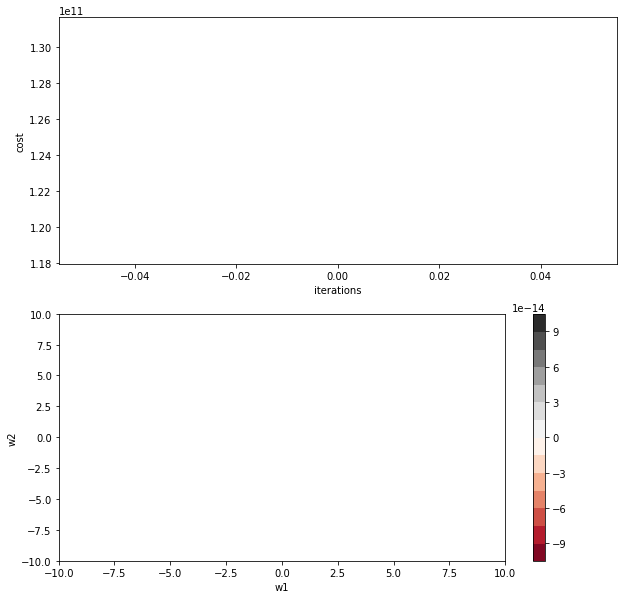

In [5]:
# LR + Batch gradient descent
w = np.zeros(3) #zero weights
alpha = 1.7575757575757578 #optimal alpha
T = 380 #optimal T
cost_vals = []
lambda_l1 = 0.0001
lambda_l2 = 0.001
for t in range(T):
  for j in range(len(w)):
    w[j] = (2*alpha/m)*np.dot((h(x,w)-y)**3,x[:,j])
  cost_vals.append(cost(y,h(x,w)))
# training complete

# results and plots
w0 = w[0] # optimal bias
w1 = np.linspace(-10,10,500)
w2 = np.linspace(-10,10,500)

costz = np.zeros((len(w1),len(w2)))
for r in range(len(w1)):
  for s in range(len(w2)):
    costz[r,s] = 0.5*np.sum(np.square((w0*x[:,0] + w1[r]*x[:,1] + w2[s]*x[:,2]) - y))

print('cost at the end of {} iterations = {}'.format(len(cost_vals), cost_vals[-1]))

fig, axes = plt.subplots(2,1, figsize=(10,10))
ax = axes[0]
ax.plot(cost_vals)
ax.set_ylabel('cost')
ax.set_xlabel('iterations')

ax = axes[1]
plt.contourf(w1, w2, costz, 15, cmap='RdGy')
plt.colorbar()
ax.set_xlabel('w1')
ax.set_ylabel('w2')
plt.show()

In [ ]:
# Grid search for LR+SGD
T_grid = list(np.linspace(450,750,31))
alpha_grid = list(np.linspace(0.01,1,100))

cost_vals = np.zeros((len(T_grid),len(alpha_grid))) # cost values matrix (cost for each combination of T and alpha)

for T in T_grid:
  for alpha in alpha_grid:
    w = np.zeros(3) # zero weights
    for t in range(int(T)):
      ind = np.random.randint(m)
      for j in range(len(w)):
        w[j] = w[j] - alpha*(h(x,w)[ind] - y[ind])*x[ind,j]
    cost_vals[T_grid.index(T)][alpha_grid.index(alpha)] = cost(y,h(x,w))

# index of minimum cost (argmin)
index = np.unravel_index(np.argmin(cost_vals, axis=None), cost_vals.shape)

print("minimum cost = {}".format(cost_vals[index]))
print("index = {}".format(index))
print("Optimal T value = {}\nOptimal alpha value = {}".format(T_grid[index[0]],alpha_grid[index[1]]))

minimum cost = 0.02420807142531571
index = (24, 34)
Optimal T value = 690.0
Optimal alpha value = 0.35000000000000003


cost at the end of 680 iterations = 0.025069810156771004


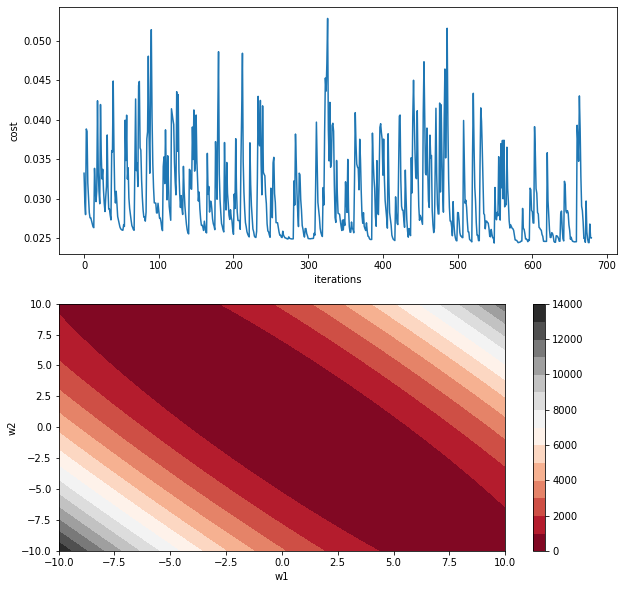

In [4]:
# LR + Stochastic gradient descent
w = np.zeros(3) #zero weights
alpha = 0.4 #optimal alpha
T = 680 #optimal T
cost_vals=[]
for t in range(T):
  ind = np.random.randint(m)
  for j in range(len(w)):
    w[j] = w[j] - 2*alpha*((h(x,w)[ind]-y[ind])**3)*x[ind,j]
  cost_vals.append(cost(y,h(x,w)))
# training complete

# results and plots
w0 = w[0] # optimal bias
w1 = np.linspace(-10,10,500)
w2 = np.linspace(-10,10,500)

costz = np.zeros((len(w1),len(w2)))
for r in range(len(w1)):
  for s in range(len(w2)):
    costz[r,s] = 0.5*np.sum(np.square((w0*x[:,0] + w1[r]*x[:,1] + w2[s]*x[:,2]) - y))

print('cost at the end of {} iterations = {}'.format(len(cost_vals), cost_vals[-1]))

fig, axes = plt.subplots(2,1, figsize=(10,10))
ax = axes[0]
ax.plot(cost_vals)
ax.set_ylabel('cost')
ax.set_xlabel('iterations')

ax = axes[1]
plt.contourf(w1, w2, costz, 15, cmap='RdGy')
plt.colorbar()
ax.set_xlabel('w1')
ax.set_ylabel('w2')

plt.show()

In [ ]:
# Grid search for LR+MBGD (time taken ~13m)
T_grid = list(np.linspace(450,750,31))
alpha_grid = list(np.linspace(1.5,2,100))

nb = 32 #batch size
rng = np.random.default_rng()
cost_vals = np.zeros((len(T_grid),len(alpha_grid))) # cost values matrix (cost for each combination of T and alpha)

for T in T_grid:
  for alpha in alpha_grid:
    w = np.zeros(3) # zero weights
    for t in range(int(T)):
      ind = rng.choice(m, 32, replace=False)
      for j in range(len(w)):
        w[j] = w[j] - (alpha/nb)*np.dot((h(x,w)[ind]-y[ind]),x[ind,j])
    cost_vals[T_grid.index(T)][alpha_grid.index(alpha)] = cost(y,h(x,w))

# index of minimum cost (argmin)
index = np.unravel_index(np.argmin(cost_vals, axis=None), cost_vals.shape)

print("minimum cost = {}".format(cost_vals[index]))
print("index = {}".format(index))
print("Optimal T value = {}\nOptimal alpha value = {}".format(T_grid[index[0]],alpha_grid[index[1]]))

minimum cost = 0.024146381787504726
index = (11, 87)
Optimal T value = 560.0
Optimal alpha value = 1.9393939393939394


cost at the end of 560 iterations = 0.024175039581724626


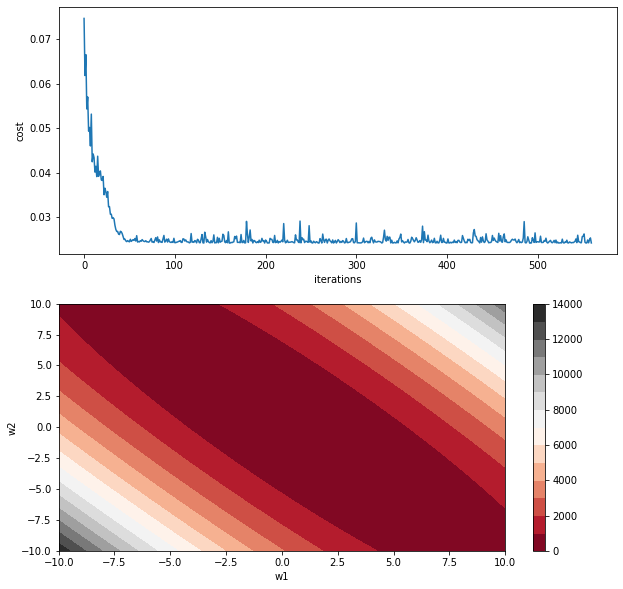

In [ ]:
# LR + Mini-batch gradient descent
nb = 32 #batch size
w = np.zeros(3) #random weights
alpha = 1.9393939393939394 #optimal alpha
T = 560 #optimal T
cost_vals = []
rng = np.random.default_rng()
for T in range(T):
  ind = rng.choice(m, 32, replace=False)
  for j in range(len(w)):
    w[j] = w[j] - (alpha/nb)*np.sum([(h(x,w)[i]-y[i])*x[i,j] for i in ind]) # np.dot(h(w,x)[i]-y[i], x[i,j])
  cost_vals.append(cost(y,h(x,w)))
# training complete

# results and plots
w0 = w[0] # optimal bias
w1 = np.linspace(-10,10,500)
w2 = np.linspace(-10,10,500)

costz = np.zeros((len(w1),len(w2)))
for r in range(len(w1)):
  for s in range(len(w2)):
    costz[r,s] = 0.5*np.sum(np.square((w0*x[:,0] + w1[r]*x[:,1] + w2[s]*x[:,2]) - y))

print('cost at the end of {} iterations = {}'.format(len(cost_vals), cost_vals[-1]))

fig, axes = plt.subplots(2,1, figsize=(10,10))
ax = axes[0]
ax.plot(cost_vals)
ax.set_ylabel('cost')
ax.set_xlabel('iterations')

ax = axes[1]
plt.contourf(w1, w2, costz, 15, cmap='RdGy')
plt.colorbar()
ax.set_xlabel('w1')
ax.set_ylabel('w2')

plt.show()